In [106]:
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
"""
CHUNK_SIZE = 1000 # Number of rows to read at a time
header_written = False

with open("behavior_log.csv", "r") as in_file:
    reader = csv.reader(in_file)
    header = next(reader)

    with open("buy_behavior_log.csv", "a", newline='') as out_file:
        writer = csv.writer(out_file)
        if not header_written:
            writer.writerow(header)
            header_written = True

        chunk = []
        for i, row in enumerate(reader):
            if row[2] == "buy":
                chunk.append(row)
            if (i + 1) % CHUNK_SIZE == 0:
                writer.writerows(chunk)
                chunk = []
        writer.writerows(chunk)
#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.
# Use this code to generate buy_behaviour_log.csv file.
"""


'\nCHUNK_SIZE = 1000 # Number of rows to read at a time\nheader_written = False\n\nwith open("behavior_log.csv", "r") as in_file:\n    reader = csv.reader(in_file)\n    header = next(reader)\n\n    with open("buy_behavior_log.csv", "a", newline=\'\') as out_file:\n        writer = csv.writer(out_file)\n        if not header_written:\n            writer.writerow(header)\n            header_written = True\n\n        chunk = []\n        for i, row in enumerate(reader):\n            if row[2] == "buy":\n                chunk.append(row)\n            if (i + 1) % CHUNK_SIZE == 0:\n                writer.writerows(chunk)\n                chunk = []\n        writer.writerows(chunk)\n#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.\n# Use this code to generate buy_behaviour_log.csv file.\n'

In [63]:
#ad_feature = pd.read_csv('PycharmProjects/SPML/ad_feature.csv')
ad_feature = pd.read_csv('ad_feature.csv')

In [64]:
#raw_sample = pd.read_csv('PycharmProjects/SPML/raw_sample.csv')
raw_sample = pd.read_csv('raw_sample.csv')

In [65]:
#user_behavior_log = pd.read_csv('PycharmProjects/SPML/buy_behavior_log.csv')
buy_behavior = pd.read_csv('buy_behavior_log.csv')


In [66]:
#user_profile = pd.read_csv('PycharmProjects/SPML/user_profile.csv')

user_profile = pd.read_csv('user_profile.csv')

unique_age_levels = user_profile["age_level"].unique()

# Print the unique values of age_level
print(user_profile.columns)

user_profile.head(5)

Index(['userid', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level '],
      dtype='object')


,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


In [67]:
buy_behavior.head(5)

,user,time_stamp,btag,cate,brand
0,916958,1493811673,buy,123,97176
1,916958,1493811809,buy,123,97176
2,628854,1493781424,buy,4262,370203
3,623496,1493810730,buy,4262,370203
4,1099015,1493774927,buy,9390,347564


In [68]:
unique_brands = buy_behavior["brand"].unique()
print(len(unique_brands))

206307


255


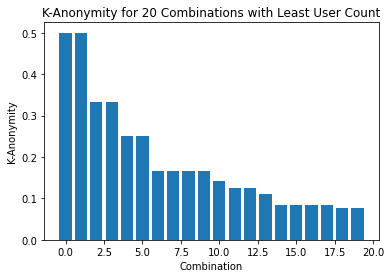

In [87]:
###### Identification attack user_groups ######

user_features = user_profile[['cms_segid', 'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ']]

# Drop rows with missing values
user_features = user_features.dropna()

# Get all possible combinations of the user features
combinations = []
for i in range(1, len(user_features.columns)+1):
    combinations += list(itertools.combinations(user_features.columns, i))
    
print(len(combinations))

combinations_count = {}
for combination in combinations:
    combination_count = len(user_features.groupby(list(combination)).size())
    combinations_count[combination] = combination_count

# Create a list of tuples from the dictionary items
counts_list = list(combinations_count.items())

# Sort the list by the count of users in ascending order
counts_list.sort(key=lambda x: x[1])

# Get the top 20 combinations with the least count
top_combinations = counts_list[:20]

# Create a list of the K-anonymity values for each combination
k_anonimity = [1/count[1] for count in top_combinations]

# Plot the K-anonymity values as a bar chart
plt.bar(range(len(k_anonimity)), k_anonimity)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Combination')
plt.ylabel('K-Anonymity')
plt.title('K-Anonymity for 20 Combinations with Least User Count')

# Show the plot
plt.show()

In [69]:
clicks_brand = pd.merge(raw_sample, ad_feature[['brand', 'adgroup_id']], how='left', on='adgroup_id')

In [70]:
clicks_with_brand = pd.merge(left=raw_sample, right=ad_feature, how='inner', on='adgroup_id')

In [144]:
# Get the value counts of all brands
brand_counts = buy_behavior['brand'].value_counts()

# Calculate the index of the first and last brand you want to include
total_brands = len(brand_counts)
middle_index = total_brands // 2
first_index = middle_index - 7
last_index = middle_index + 8

# Get the average 5 interacted brands
average_15_brands = brand_counts.iloc[first_index:last_index].index.tolist()

# Filter the buy_behavior dataframe to only include the least 5 brands
average_15_buy_behavior = buy_behavior[buy_behavior['brand'].isin(average_15_brands)]

age_level    1    2    3    4    5
brand                             
47093      3.0  1.0  1.0  0.0  0.0
52891      0.0  0.0  2.0  2.0  1.0
121267     0.0  2.0  1.0  2.0  0.0
126630     1.0  1.0  1.0  1.0  1.0
155973     0.0  0.0  4.0  0.0  1.0
167099     0.0  0.0  0.0  0.0  3.0
184002     2.0  0.0  0.0  2.0  1.0
237949     1.0  0.0  1.0  1.0  2.0
244293     0.0  0.0  0.0  5.0  0.0
273442     0.0  2.0  0.0  1.0  2.0
369693     0.0  0.0  2.0  2.0  1.0
371807     0.0  0.0  3.0  2.0  0.0
392210     0.0  1.0  3.0  1.0  0.0
400861     0.0  0.0  1.0  3.0  1.0
450094     0.0  0.0  1.0  1.0  3.0


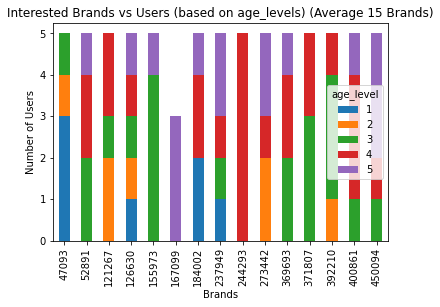

In [145]:
clicks_user_brand = pd.merge(clicks_brand, user_profile[['final_gender_code', 'age_level', 'userid']], how='left',
                             left_on='user', right_on='userid')
#filter out columns not required
#join columns with behavior log and user datasets

#top_5_brands = buy_behavior['brand'].value_counts().head(5).index.tolist()
#top_5_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_5_brands)]


# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(average_15_buy_behavior, user_profile, left_on='user', right_on='userid')


# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = merged_df.groupby(['age_level', 'brand'], as_index=False).count()[['age_level', 'brand', 'user']]


# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='age_level', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

# Plot the pivot table as a bar plot
pivot_table.plot(kind='bar', stacked=True)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Brands')
plt.ylabel('Number of Users')
plt.title('Interested Brands vs Users (based on age_levels) (Average 15 Brands)')

# Show the plot
plt.show()













In [146]:
###### Following is a table generated that shows for top 5 brands how each age group interacts with each brand #########
##### Using this information we can create dummy figure 4  #####


# Get the total number of users for each age level
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the age level totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)

ambiguity_table = 100 - percent_table

# Round the values in the ambiguity table to 2 decimal places
ambiguity_table = ambiguity_table.round(2)

# Print the ambiguity table
print(ambiguity_table)

print(percent_table)

age_level      1      2      3      4      5
brand                                       
47093       40.0   80.0   80.0  100.0  100.0
52891      100.0  100.0   60.0   60.0   80.0
121267     100.0   60.0   80.0   60.0  100.0
126630      80.0   80.0   80.0   80.0   80.0
155973     100.0  100.0   20.0  100.0   80.0
167099     100.0  100.0  100.0  100.0    0.0
184002      60.0  100.0  100.0   60.0   80.0
237949      80.0  100.0   80.0   80.0   60.0
244293     100.0  100.0  100.0    0.0  100.0
273442     100.0   60.0  100.0   80.0   60.0
369693     100.0  100.0   60.0   60.0   80.0
371807     100.0  100.0   40.0   60.0  100.0
392210     100.0   80.0   40.0   80.0  100.0
400861     100.0  100.0   80.0   40.0   80.0
450094     100.0  100.0   80.0   80.0   40.0
age_level     1     2     3      4      5
brand                                    
47093      60.0  20.0  20.0    0.0    0.0
52891       0.0   0.0  40.0   40.0   20.0
121267      0.0  40.0  20.0   40.0    0.0
126630     20.0  20.0  20

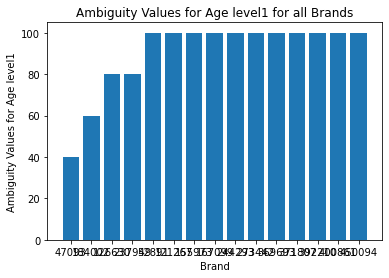

In [147]:
age_level1_ambiguity = ambiguity_table[1].sort_values()
age_level1_ambiguity.index = age_level1_ambiguity.index.astype(str)


plt.bar(age_level1_ambiguity.index, age_level1_ambiguity)

# Add labels and title to the plot
plt.xlabel('Brand')
plt.ylabel('Ambiguity Values for Age level1')
plt.title('Ambiguity Values for Age level1 for all Brands')

# Show the plot
plt.show()

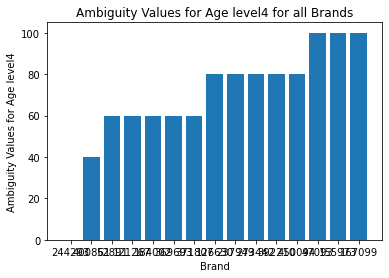

In [149]:
age_level4_ambiguity = ambiguity_table[4].sort_values()
age_level4_ambiguity.index = age_level4_ambiguity.index.astype(str)


plt.bar(age_level4_ambiguity.index, age_level4_ambiguity)

# Add labels and title to the plot
plt.xlabel('Brand')
plt.ylabel('Ambiguity Values for Age level4')
plt.title('Ambiguity Values for Age level4 for all Brands')

# Show the plot
plt.show()

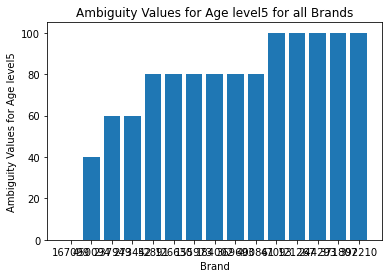

In [150]:
age_level5_ambiguity = ambiguity_table[5].sort_values()
age_level5_ambiguity.index = age_level5_ambiguity.index.astype(str)


plt.bar(age_level5_ambiguity.index, age_level5_ambiguity)

# Add labels and title to the plot
plt.xlabel('Brand')
plt.ylabel('Ambiguity Values for Age level5')
plt.title('Ambiguity Values for Age level5 for all Brands')

# Show the plot
plt.show()

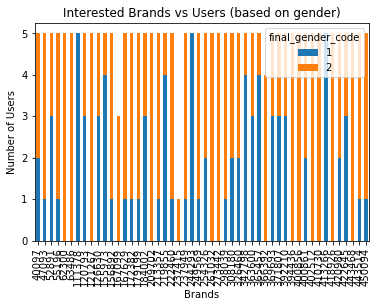

In [127]:
## Filter the behavior log to only include the rows where the brand was part of Average 15 interacted brands vs Gender ##

# Get the value counts of all brands
brand_counts = buy_behavior['brand'].value_counts()

# Calculate the index of the first and last brand you want to include
total_brands = len(brand_counts)
middle_index = total_brands // 2
first_index = middle_index - 25
last_index = middle_index + 25

# Get the average 15 interacted brands
average_50_brands = brand_counts.iloc[first_index:last_index].index.tolist()

# Filter the buy_behavior dataframe to only include the least 15 brands
average_50_buy_behavior = buy_behavior[buy_behavior['brand'].isin(average_50_brands)]

#top_15_brands = buy_behavior['brand'].value_counts().head(50).index.tolist()
#top_15_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_15_brands)]


# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(average_50_buy_behavior, user_profile, left_on='user', right_on='userid')

# Group the merged dataframe by the 'brand' and 'final_gender_code' columns and get the count of each group
grouped_df = merged_df.groupby(['brand', 'final_gender_code'], as_index=False).count()[['brand', 'final_gender_code', 'user']]

# Pivot the grouped dataframe to create a pivot table with the 'brand' column as the index, the 'final_gender_code' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')
pivot_table = pivot_table.fillna(0)

# Plot the pivot table as a bar plot
pivot_table.plot(kind='bar', stacked=True)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Brands')
plt.ylabel('Number of Users')
plt.title('Interested Brands vs Users (based on gender)')

# Show the plot
plt.show()

In [102]:
# Pivot the grouped dataframe to create a pivot table with the 'final_gender_code' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')

# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)

# Compute the ambiguity metric values by subtracting the percent values from 100
ambiguity_table = 100 - percent_table

# Round the values in the ambiguity table to 2 decimal places
ambiguity_table = ambiguity_table.round(2)

# Print the ambiguity table
print(ambiguity_table)

final_gender_code      1      2
brand                          
40097               60.0   40.0
47093               80.0   20.0
52891               40.0   60.0
55196               80.0   20.0
62300              100.0    0.0
63486              100.0    0.0
111378               0.0  100.0
120793              40.0   60.0
121267             100.0    0.0
126630              40.0   60.0
155973              20.0   80.0
156892              80.0   20.0
167099             100.0    0.0
167629              80.0   20.0
172382              80.0   20.0
179199              80.0   20.0
184002              40.0   60.0
209702             100.0    0.0
213357              80.0   20.0
219855              20.0   80.0
222460              80.0   20.0
237415             100.0    0.0
237949              80.0   20.0
244293               0.0  100.0
249569              80.0   20.0
254326              60.0   40.0
261032             100.0    0.0
273442             100.0    0.0
298039              80.0   20.0
308180  

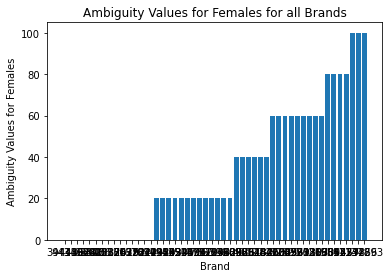

In [121]:
female_ambiguity = ambiguity_table[2].sort_values()
female_ambiguity.index = female_ambiguity.index.astype(str)


plt.bar(female_ambiguity.index, female_ambiguity)

# Add labels and title to the plot
plt.xlabel('Brand')
plt.ylabel('Ambiguity Values for Females')
plt.title('Ambiguity Values for Females for all Brands')

# Show the plot
plt.show()


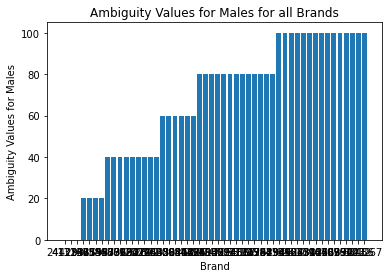

In [122]:
male_ambiguity = ambiguity_table[1].sort_values()
male_ambiguity.index = male_ambiguity.index.astype(str)


plt.bar(male_ambiguity.index, male_ambiguity)

# Add labels and title to the plot
plt.xlabel('Brand')
plt.ylabel('Ambiguity Values for Males')
plt.title('Ambiguity Values for Males for all Brands')

# Show the plot
plt.show()

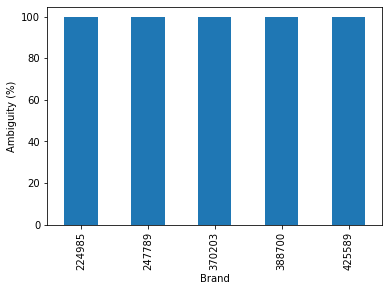

In [81]:
####### Generating figure 5 results #########

df = pd.merge(buy_behavior, user_profile, left_on="user", right_on="userid")

# Get the top 5 brands
top_brands = df["brand"].value_counts().nlargest(5).index.tolist()

# Filter the DataFrame to only include the top 5 brands
df = df[df["brand"].isin(top_brands)]

# Create a pivot table to get the age_level frequency for each brand
pivot_table = pd.pivot_table(df, values="user", index="brand", columns="age_level", aggfunc="count")

# Normalize the pivot table to get the percentage of each age_level for each brand
normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Calculate the ambiguity for each brand
ambiguity = 100 - normalized_table.max(axis=1)

# Plot the ambiguity as a bar chart
ambiguity.plot(kind="bar")

# Add labels to the x-axis and y-axis
plt.xlabel("Brand")
plt.ylabel("Ambiguity (%)")

# Show the plot
plt.show()